In [1]:
import numpy as np
import scipy.io
import mne
from mne import io
from pathlib import Path
from mne.stats import permutation_t_test
import matplotlib.pyplot as plt

## Data import from EEGLAB

In [2]:
# importing via .mat files
data_path = Path(".")
data_path = data_path / "DATA"
raw_fname_eeglab_set = data_path / "sub-02_pre-iTBS_250_ cleaned.set"
raw_fname_pre = data_path / "pre_iTBS_PSD.mat"
raw_fname_post = data_path / "post_iTBS_PSD.mat"
raw_fname_ch = data_path / "ch_loc.mat"
raw_fname_frequencies = data_path / "frequncies.mat"

In [4]:
# import from EEGLAB .set
eeglab_raw = mne.io.read_raw_eeglab(raw_fname_eeglab_set,preload=True)
eeglab_raw.info

C:\Users\asus\AppData\Local\Temp\ipykernel_266228\953166472.py:2: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  eeglab_raw = mne.io.read_raw_eeglab(raw_fname_eeglab_set,preload=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_266228\953166472.py:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeglab_raw = mne.io.read_raw_eeglab(raw_fname_eeglab_set,preload=True)


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [5]:
# Load the .mat files
mat_pre_iTBS_PSD = scipy.io.loadmat(raw_fname_pre)
mat_post_iTBS_PSD = scipy.io.loadmat(raw_fname_post)
mat_ch_loc = scipy.io.loadmat(raw_fname_ch)
mat_frequencies = scipy.io.loadmat(raw_fname_frequencies)
# Display the keys to understand the structure of the files
print(mat_pre_iTBS_PSD.keys())
print(mat_post_iTBS_PSD.keys())
print(mat_ch_loc.keys())
print(mat_frequencies.keys())
# Ensure that the data is in the form of a NumPy arrays
pre_iTBS_PSD_array = np.array(mat_pre_iTBS_PSD['pre_iTBS_PSD'])
post_iTBS_PSD_array = np.array(mat_post_iTBS_PSD['post_iTBS_PSD'])
ch_loc_array = np.array(mat_ch_loc['ch_loc'])
frequencies_array = np.array(mat_frequencies['F_post'])
frequencies_array = frequencies_array.reshape(513)
print(pre_iTBS_PSD_array.shape)
print(post_iTBS_PSD_array.shape)
print(ch_loc_array.shape)
print(frequencies_array.shape)

dict_keys(['__header__', '__version__', '__globals__', 'pre_iTBS_PSD'])
dict_keys(['__header__', '__version__', '__globals__', 'post_iTBS_PSD'])
dict_keys(['__header__', '__version__', '__globals__', 'ch_loc'])
dict_keys(['__header__', '__version__', '__globals__', 'F_post'])
(10, 64, 513)
(10, 64, 513)
(64, 2)
(513,)


## Fig 2.A

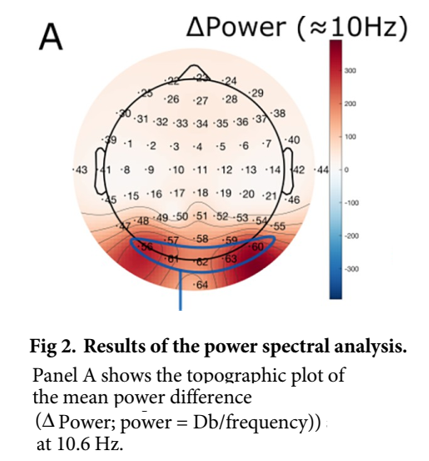


In [6]:
# frequency(42) = 10 Hz
# Averaging over subjects
pre_iTBS_PSD_array_subAveraged_10Hz = np.mean(pre_iTBS_PSD_array[:, :, 42], axis=0)
post_iTBS_PSD_array_subAveraged_10Hz = np.mean(post_iTBS_PSD_array[:, :, 42], axis=0)
PostPreDiff_iTBS_PSD_array_subAveraged_10Hz = post_iTBS_PSD_array_subAveraged_10Hz - pre_iTBS_PSD_array_subAveraged_10Hz
print(pre_iTBS_PSD_array_subAveraged_10Hz.shape)
print(post_iTBS_PSD_array_subAveraged_10Hz.shape)
print(PostPreDiff_iTBS_PSD_array_subAveraged_10Hz.shape)

(64,)
(64,)
(64,)


In [7]:
channels_name = ['FT9','F7','FT7','T7','AF7','F5','FC5','C5','FP1',
'AF3','F3','FC3','F1','FC1','FZ','FCz','TP7','P7','PO9','CP5','P5',
'PO7','C3','CP3','O1','Oz','P3','PO3','POz','P1','PZ','CP1','FT10',
'F8','FT8','T8','AF8','F6','FC6','C6','FP2','AF4','F4','FC4','C4',
'F2','FC2','Cz','TP8','P8','PO10','CP6','P6','PO8','O2','PO4','CP4',
'P4','C2','CP2','P2','CPZ','C1','AFZ']

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
C:\Users\asus\AppData\Local\Temp\ipykernel_266228\3243507117.py:16: SyntaxWarning: invalid escape sequence '\D'
  clb.ax.set_title("$ \Delta $ Power",fontsize=12) # title on top of colorbar


Text(0.5, 1.0, '$ \\Delta $ Power')

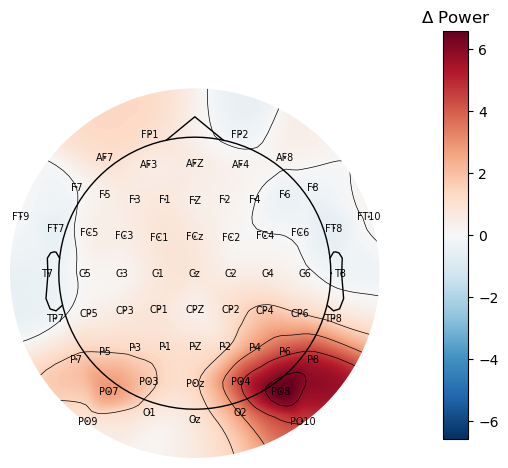

In [8]:
fig,(ax1) = plt.subplots(ncols=1)
im, cn = mne.viz.plot_topomap(PostPreDiff_iTBS_PSD_array_subAveraged_10Hz,
                              eeglab_raw.info,
                              ch_type='eeg',
                              names=channels_name,
                              size=3,
                              axes=ax1,
                              show=False)
# manually fiddle the position of colorbar
ax_x_start = 0.9
ax_x_width = 0.04
ax_y_start = 0.15
ax_y_height = 0.85
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title("$ \Delta $ Power",fontsize=12) # title on top of colorbar

## Fig 2.C

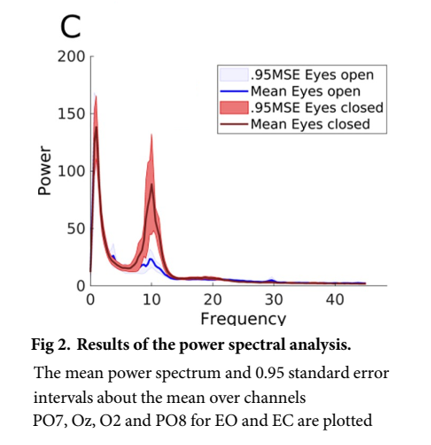

In [15]:
# Averaging over subjects
pre_iTBS_PSD_array_subAveraged = np.mean(pre_iTBS_PSD_array[:, :, :], axis=0)
post_iTBS_PSD_array_subAveraged = np.mean(post_iTBS_PSD_array[:, :, :], axis=0)
channels_peak = [22, 25, 26, 54, 55] # % channel ID's for [PO7 O1 Oz PO8 O2]
# Averaging over peaked channels
pre_iTBS_PSD_array_subAveraged_PeakedChAveraged = np.mean(pre_iTBS_PSD_array_subAveraged[channels_peak, :], axis=0)
post_iTBS_PSD_array_subAveraged_PeakedChAveraged = np.mean(post_iTBS_PSD_array_subAveraged[channels_peak, :], axis=0)
print(pre_iTBS_PSD_array_subAveraged_PeakedChAveraged.shape)
print(post_iTBS_PSD_array_subAveraged_PeakedChAveraged.shape)

(513,)
(513,)


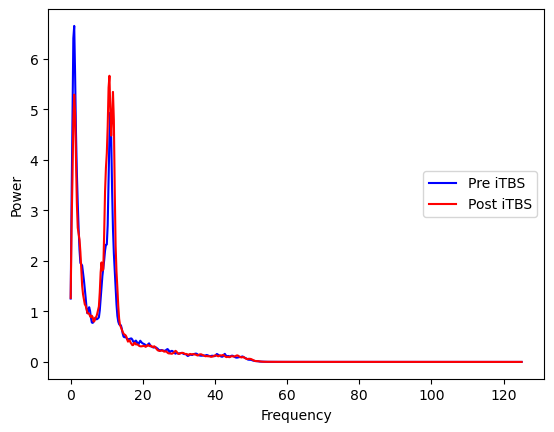

In [34]:
plt.plot(frequencies_array, pre_iTBS_PSD_array_subAveraged_PeakedChAveraged, 'b', label = 'Pre iTBS')
plt.plot(frequencies_array, post_iTBS_PSD_array_subAveraged_PeakedChAveraged, 'r', label = 'Post iTBS')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(loc = 5)
plt.show()

## Permutation T-Test

### Non-parametric tests
Instead of assuming an underlying Gaussian distribution, we could instead use a non-parametric resampling method. In the case of a paired t-test between two conditions A and B, which is mathematically equivalent to a one-sample t-test between the difference in the conditions A-B, under the null hypothesis we have the principle of exchangeability. This means that, if the null is true, we can exchange conditions and not change the distribution of the test statistic.

When using a paired t-test, exchangeability thus means that we can flip the signs of the difference between A and B. Therefore, we can construct the null distribution values for each voxel by taking random subsets of samples (subjects), flipping the sign of their difference, and recording the absolute value of the resulting statistic (we record the absolute value because we conduct a two-tailed test). The absolute value of the statistic evaluated on the veridical data can then be compared to this distribution, and the p-value is simply the proportion of null distribution values that are smaller.

In the case where n_permutations is large enough (or “all”) so that the complete set of unique resampling exchanges can be done (which is 
 $2^{N_{Samples}}-1$ for a one-tailed and $2^{N_{Samples}-1}-1$ 
 for a two-tailed test, not counting the veridical distribution), instead of randomly exchanging conditions the null is formed from using all possible exchanges. This is known as a permutation test (or exact test).

In [9]:
frequency_band = np.logical_and(8.00 <= frequencies_array, frequencies_array <= 12.00)

In [22]:
# averaging on frequency points 
PostPreDiff_iTBS_PSD_array = post_iTBS_PSD_array-pre_iTBS_PSD_array
PostPreDiff_iTBS_PSD_array_frequencyBandAveraged = np.mean(PostPreDiff_iTBS_PSD_array[:, :, frequency_band], axis=2)
np.shape(PostPreDiff_iTBS_PSD_array_frequencyBandAveraged)

(10, 64)

In [24]:
picks = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [131]:
picks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [26]:
n_permutations = 5000
T0, p_values, H0 = permutation_t_test(PostPreDiff_iTBS_PSD_array_frequencyBandAveraged, n_permutations, n_jobs=None)

significant_channels = picks[p_values <= 0.05]
significant_channels_names = [eeglab_raw.ch_names[k] for k in significant_channels]

print("Number of significant channels : %d" % len(significant_channels))
print("Sensors names : %s" % significant_channels_names)

Permuting 511 times (exact test)...
Number of significant channels : 0
Sensors names : []


Text(0.5, 1.0, 'p_values')

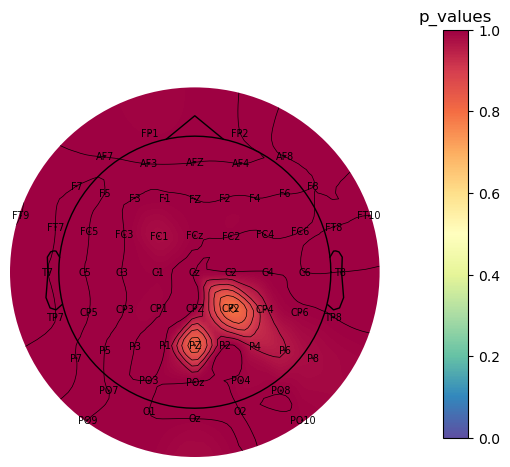

In [58]:
fig,(ax1) = plt.subplots(ncols=1)
im, cn = mne.viz.plot_topomap(p_values,
                              eeglab_raw.info,
                              ch_type='eeg',
                              names=channels_name,
                              cmap="Spectral_r",
                              size=3,
                              axes=ax1,
                              show=False)
# manually fiddle the position of colorbar
ax_x_start = 0.9
ax_x_width = 0.04
ax_y_start = 0.15
ax_y_height = 0.85
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title("p_values",fontsize=12) # title on top of colorbar

Text(0.5, 1.0, 'T-Value')

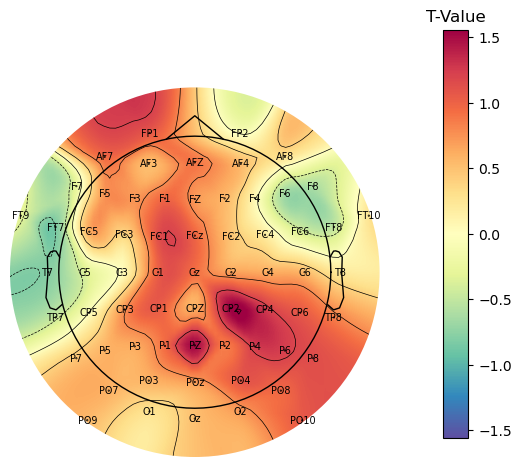

In [59]:
fig,(ax1) = plt.subplots(ncols=1)
im, cn = mne.viz.plot_topomap(T0,
                              eeglab_raw.info,
                              ch_type='eeg',
                              names=channels_name,
                              cmap="Spectral_r",
                              size=3,
                              axes=ax1,
                              show=False)
# manually fiddle the position of colorbar
ax_x_start = 0.9
ax_x_width = 0.04
ax_y_start = 0.15
ax_y_height = 0.85
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title("T-Value",fontsize=12) # title on top of colorbar